# Neuron circuits for Dorsophila
Tielin Zhang, 2019-6-13

Contains three groups of neurons:

(1)For information input group;

(2)For the inhibitory tuning group;

(3)for informatin output group;

In [1]:
from brian2 import *
import random
%matplotlib inline

In [2]:
20*volt
1000*amp
1e6*volt
1000*namp
10*mA*5*Mohm

50. * kvolt

In [3]:
start_scope()

## PN Group (input, LIF model)

A PN is modeled as the standard leaky integrate and fire (LIF) neuron. The membrane potential of a PN at time t is determined by the following differential equation, $\frac{dV}{dt} = \frac{(V0−V)}{\tau}+ I$, where τm is the membrane time constant and V0 is the resting potential. When the membrane potential of a PN exceeds the threshold value Vth, the PN emits a spike and the value of the membrane potential is reset to Vreset. After the spike emission, the PN enters an absolute refractory period that lasts for Vres. The membrane potential of a PN stays at Vres during the refractory period. The parameters in the leaky integrate-and-fire neuron model are set as follows: tau=5 ms,V0=−60mV,Vth=−45mV, Vreset=−80mV,and Vres =1 ms.

Around 150-200 PN neurons, or 100 neurons ? which one?

In [4]:
tau = 5*ms
V0 = -60*mV
Vth = -45*mV
Vres = -80*mV
I = 0*volt
eqs_pn = '''
dv/dt = (V0-v)/tau + I: volt
'''
G_pn = NeuronGroup(100, eqs_pn, threshold='v>Vth', reset='v=Vres', refractory=1*ms, method='Euler') #method='Euler' linear
G_pn.v = -60*mV # initial value

## KC Group (output, LIF model)

Here we use the similar LIF model for simplification.

Around 2500 KC neurons.


In [5]:
tau = 5*ms
V0 = -60*mV
Vth = -45*mV
Vres = -80*mV
# I = 0*volt
eqs_kc = '''
dv/dt = (V0-v)/tau : volt
'''
G_kc = NeuronGroup(2500, eqs_kc, threshold='v>Vth', reset='v=Vres', refractory=1*ms, method='Euler') #method='Euler' linear
G_kc.v = -60*mV # initial value

### APL Group (tuning inhibition, LIF model)

In [6]:
tau = 5*ms
V0 = -60*mV
Vth = -45*mV
Vres = -80*mV
# I = 0*volt
eqs_apl = '''
dv/dt = (V0-v)/tau : volt
'''
G_apl = NeuronGroup(1, eqs_apl, threshold='v>Vth', reset='v=Vres', refractory=1*ms, method='Euler') #method='Euler' linear
G_apl.v = -60*mV # initial value

### Connection between PN to KC

(1) PN->KC, each KC neuron accept mean 6 PN Axonal Terminal, 

(2) Big PN Axonal terminal to 20 KC neuron, 

(3) Small PN Axonal terminal to 8 KC neuron,

You cannot fit both of these three conditions.!!

99
2495
1880
1880


WARNING    C:\ProgramData\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Zhang\.cython\brian_extensions\_cython_magic_36ef093112cd1b088f6c8d6bb9179d1a.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": https://visualstudio.microsoft.com/downloads/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


mean KC accept : 0.752
big PN axonal ternimal number distribution: 


Text(0, 0.5, 'Numbers of axonal terminal')

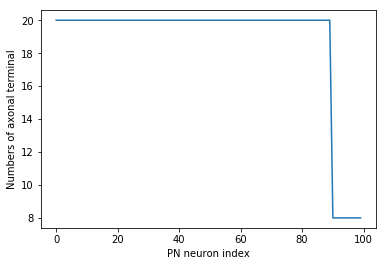

In [8]:
S_pk = Synapses(G_pn, G_kc, 'w : volt', on_pre='v_post += w')

propertion = 0.9 # the big Pn proportion in source group
bigPn = np.arange( 0, propertion*len(S_pk.source), 1) 
smallPn = np.arange( propertion*len(S_pk.source), len(S_pk.source), 1) 

arrayi = []
arrayj = []
for i in range(len(bigPn)):
    bigKc = [random.randint(0,len(S_pk.target))-1 for _ in range(20)] # select 20 KC neuron
    arrayi.extend([bigPn[i]]*20)
    arrayj.extend(bigKc)
for i in range(len(smallPn)):
    smallKc = [random.randint(0,len(S_pk.target))-1 for _ in range(8)] # select 8 KC neuron
    arrayi.extend([smallPn[i]]*8)
    arrayj.extend(smallKc)
arrayi = [int(i) for i in arrayi]
arrayj = [int(j) for j in arrayj]

print(max(arrayi))
print(max(arrayj))

print(len(arrayi))
print(len(arrayj))

S_pk.connect(i=arrayi, j=arrayj)
# S.connect(condition='i!=j', p=0.06)
# S.delay = 'j*2*ms'
S_pk.w = '1*mV'

print('mean KC accept : ' + str(len(S_pk.i)/G_kc.N)) # the mean number of KC accepted PN Axonal Terminal
print('big PN axonal ternimal number distribution: ')

# inarr = np.array(S.i)
unique, counts = numpy.unique(S_pk.i, return_counts=True)
plot(unique, counts)
xlabel('PN neuron index')
ylabel('Numbers of axonal terminal')


### Connection APL-PN, APL->KC

APL->PN, presynaptic inhibition, the bigger soma, the bigger inhibition. 

体积最小的抑制为0，体积最大的抑制设置为0.4（因为我们结构上观察到0-4个突触前抑制），只是这样的话PN terminal和KC的对应关系也要是线性分布（这部分数据我在整理）不知道程序语言描述上是否有困难。

APL->KC, one to all inhibition;




In [9]:
S_ap = Synapses(G_apl, G_pn, 'w : volt', on_pre='v_post -= w')

# the i j is full connection ,but big pn with more inhibition, 


